# Romanian Semantic Textual Similarity

In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
language = "Romanian"
train = pd.read_csv("train.csv", sep="\t")
test = pd.read_csv("test.csv", sep="\t")

Let's see what are the rows in train and test datasets

In [4]:
train[:10]

,id,sentence_1,sentence_2,similarity
0,0,Un avion decolează.,Un avion este în curs de decolare.,5.00
1,1,Un bărbat cântă la un flaut mare.,Un bărbat cântă la un flaut.,3.80
2,2,Un bărbat pune brânză mărunțită pe o pizza.,Un bărbat pune brânză mărunțită pe o pizza neg...,3.80
3,3,Trei bărbați joacă șah.,Doi bărbați joacă șah.,2.60
4,4,Un bărbat cântă la violoncel.,Un bărbat stând jos cântă la violoncel.,4.25
5,5,Niște bărbați se luptă.,Doi bărbați se luptă.,4.25
6,6,Un bărbat fumează.,Un bărbat patinează.,0.50
7,7,Bărbatul cântă la pian.,Bărbatul cântă la o chitară.,1.60
8,8,Un bărbat cântă la chitară și voce.,O femeie cântă la chitară acustică și voce.,2.20
9,9,O persoană aruncă o pisică spre tavan.,O persoană aruncă o pisică către tavan.,5.00


In [5]:
train.describe()

,id,similarity
count,5749.00000,5749.000000
mean,2874.00000,2.700999
std,1659.73768,1.464398
min,0.00000,0.000000
25%,1437.00000,1.500000
50%,2874.00000,3.000000
75%,4311.00000,3.800000
max,5748.00000,5.000000


In [6]:
test[:10]

,id,sentence_1,sentence_2,similarity
0,0,O fată își aranjează părul.,O fată se piaptănă.,2.500
1,1,Un grup de bărbați joacă fotbal pe plajă.,Un grup de băieți joacă fotbal pe plajă.,3.600
2,2,O femeie măsoară glezna unei alte femei.,O femeie măsoară glezna unei alte femei.,5.000
3,3,Un bărbat taie un castravete.,Un bărbat feliază un castravete.,4.200
4,4,Un bărbat cântă la harpă.,Un bărbat cântă la claviatură.,1.500
5,5,O femeie taie cepe.,O femeie taie tofu.,1.800
6,6,Un bărbat merge pe o bicicletă electrică.,Un bărbat merge pe bicicletă.,3.500
7,7,Un bărbat cântă la tobe.,Un bărbat cântă la chitară.,2.200
8,8,Un bărbat cântă la chitară.,O doamnă cântă la chitară.,2.200
9,9,Un bărbat cântă la chitară.,Un bărbat cântă la trompetă.,1.714


In [7]:
def convert(row):
    if row['similarity'] <= 1.0:
        return '0-1'
    elif 1.0 < row['similarity'] <= 2.0:
        return '1-2'
    elif 2.0 < row['similarity'] <= 3.0:
        return '2-3'
    elif 3.0 < row['similarity'] <= 4.0:
        return '3-4'
    else:
        return '4-5'

train['category'] = train.apply(convert, axis=1)
test['category'] = test.apply(convert, axis=1)

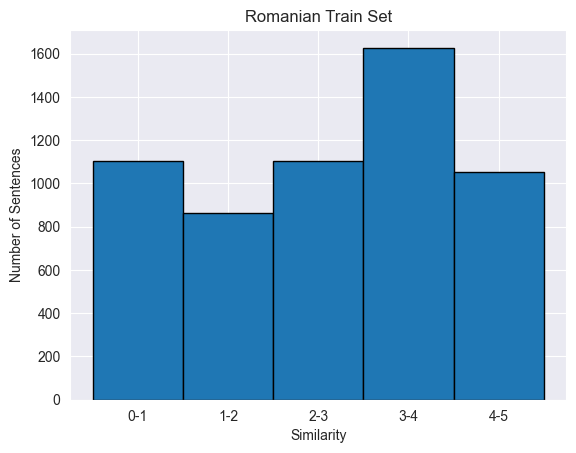

In [8]:
train.groupby("category")['id'].count().plot.bar(width=1,edgecolor = "black",xlabel="Similarity", ylabel="Number of Sentences", rot=0)
plt.title(language + " Train Set")
plt.show()

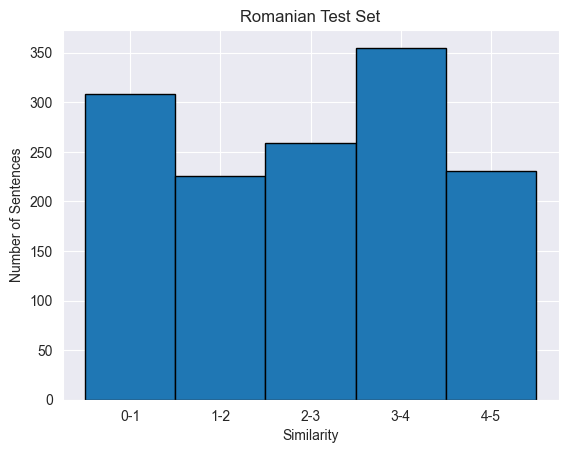

In [9]:
test.groupby("category")['id'].count().plot.bar(width=1,edgecolor = "black",xlabel="Similarity", ylabel="Number of Sentences", rot=0)
plt.title(language + " Test Set")
plt.show()

In [10]:
def normalized_word_Common(row, column_1, column_2):
    w1 = set(map(lambda word: word.lower().strip(), row[column_1].split()))
    w2 = set(map(lambda word: word.lower().strip(), row[column_2].split()))
    return 1.0* len(w1 & w2)

def normalized_word_Total(row, column_1, column_2):
    w1 = set(map(lambda word: word.lower().strip(), row[column_1].split()))
    w2 = set(map(lambda word: word.lower().strip(), row[column_2].split()))
    return 1* (len(w1) + len(w2))

def normalized_word_share(row, column_1, column_2):
    w1 = set(map(lambda word: word.lower().strip(), row[column_1].split()))
    w2 = set(map(lambda word: word.lower().strip(), row[column_2].split()))
    return 1.0*len(w1 & w2) / (len(w1) + len(w2))

def prepare_frequencies(df, id_column, column_1, column_2):
    df['freq_1'] = df.groupby(id_column)[id_column].transform('count')
    df['freq_2'] = df.groupby(id_column)[id_column].transform('count')
    df['s1len'] = df[column_1].str.len()
    df['s2len'] = df[column_2].str.len()
    df['s1_n_words'] = df[column_1].apply(lambda row :len(row.split(" ")))
    df['s2_n_words'] = df[column_2].apply(lambda row :len(row.split(" ")))

    df['word_Common'] = df.apply(normalized_word_Common, args=(column_1,column_2), axis=1)
    df['word_Total'] = df.apply(normalized_word_Total, args=(column_1,column_2), axis = 1)
    df['word_share'] = df.apply(normalized_word_share, args=(column_1,column_2), axis = 1)

    df['freq_s1+s2'] = df['freq_1'] + df['freq_2']
    df['freq_s1-s2'] = abs(df['freq_1'] - df['freq_2'])

    return df


In [11]:
train = prepare_frequencies(train, "id", "sentence_1", "sentence_2")
test = prepare_frequencies(test, "id", "sentence_1", "sentence_2")

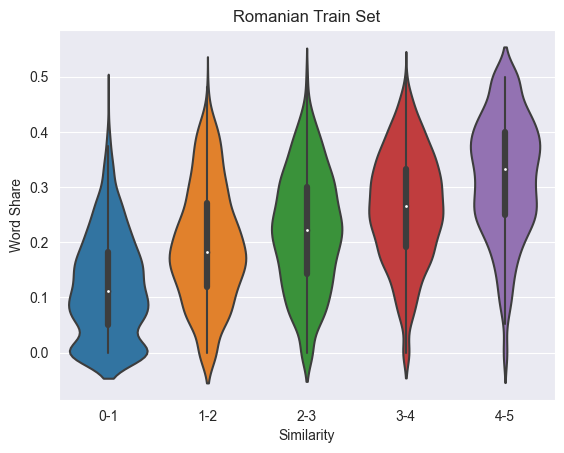

In [12]:
ax = sns.violinplot(x = 'category', y='word_share', data = train[0:], order=[ "0-1", "1-2", "2-3", "3-4", "4-5"])
ax.set_title(language + " Train Set")
ax.set_xlabel('Similarity')
ax.set_ylabel('Word Share')
plt.show()

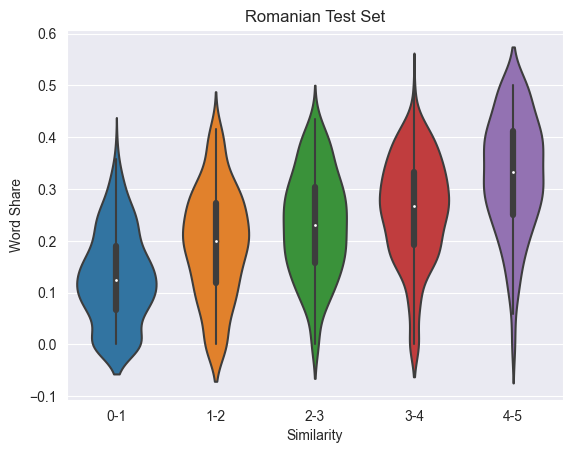

In [13]:
ax = sns.violinplot(x = 'category', y='word_share', data = test[0:], order=[ "0-1", "1-2", "2-3", "3-4", "4-5"])
ax.set_title(language + " Test Set")
ax.set_xlabel('Similarity')
ax.set_ylabel('Word Share')
plt.show()

In [14]:
train[:10]

,id,sentence_1,sentence_2,similarity,category,freq_1,freq_2,s1len,s2len,s1_n_words,s2_n_words,word_Common,word_Total,word_share,freq_s1+s2,freq_s1-s2
0,0,Un avion decolează.,Un avion este în curs de decolare.,5.00,4-5,1,1,19,34,3,7,2.0,10,0.200000,2,0
1,1,Un bărbat cântă la un flaut mare.,Un bărbat cântă la un flaut.,3.80,3-4,1,1,33,28,7,6,4.0,11,0.363636,2,0
2,2,Un bărbat pune brânză mărunțită pe o pizza.,Un bărbat pune brânză mărunțită pe o pizza neg...,3.80,3-4,1,1,43,52,8,9,7.0,17,0.411765,2,0
3,3,Trei bărbați joacă șah.,Doi bărbați joacă șah.,2.60,2-3,1,1,23,22,4,4,3.0,8,0.375000,2,0
4,4,Un bărbat cântă la violoncel.,Un bărbat stând jos cântă la violoncel.,4.25,4-5,1,1,29,39,5,7,5.0,12,0.416667,2,0
5,5,Niște bărbați se luptă.,Doi bărbați se luptă.,4.25,4-5,1,1,23,21,4,4,3.0,8,0.375000,2,0
6,6,Un bărbat fumează.,Un bărbat patinează.,0.50,0-1,1,1,18,20,3,3,2.0,6,0.333333,2,0
7,7,Bărbatul cântă la pian.,Bărbatul cântă la o chitară.,1.60,1-2,1,1,23,28,4,5,3.0,9,0.333333,2,0
8,8,Un bărbat cântă la chitară și voce.,O femeie cântă la chitară acustică și voce.,2.20,2-3,1,1,35,43,7,8,5.0,15,0.333333,2,0
9,9,O persoană aruncă o pisică spre tavan.,O persoană aruncă o pisică către tavan.,5.00,4-5,1,1,38,39,7,7,5.0,12,0.416667,2,0


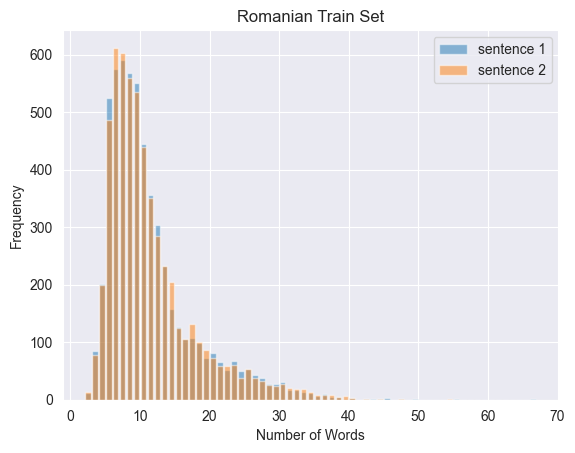

In [15]:
bin_edges = range(min(train['s1_n_words']), max(train['s1_n_words']) + 2, 1)
plt.hist(train['s1_n_words'], bins=bin_edges, rwidth=0.8, alpha=0.5, label="sentence 1")
plt.hist(train['s2_n_words'], bins=bin_edges, rwidth=0.8, alpha=0.5, label="sentence 2")
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.title(language + " Train Set")
plt.legend()
plt.show()

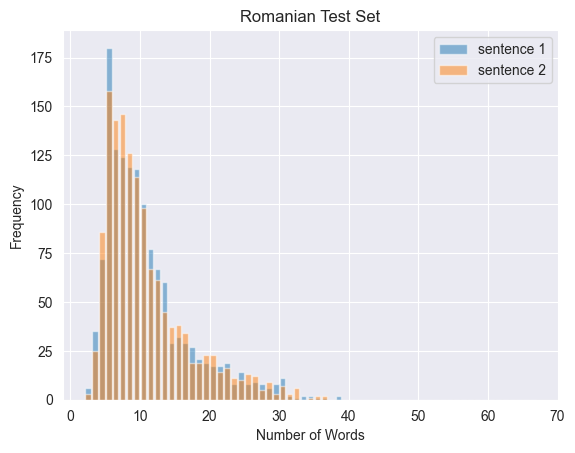

In [16]:
bin_edges = range(min(train['s1_n_words']), max(train['s1_n_words']) + 2, 1)
plt.hist(test['s1_n_words'], bins=bin_edges, rwidth=0.8, alpha=0.5, label="sentence 1")
plt.hist(test['s2_n_words'], bins=bin_edges, rwidth=0.8, alpha=0.5, label="sentence 2")
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.title(language + " Test Set")
plt.legend()
plt.show()

In [17]:
train.describe()

,id,similarity,freq_1,freq_2,s1len,s2len,s1_n_words,s2_n_words,word_Common,word_Total,word_share,freq_s1+s2,freq_s1-s2
count,5749.00000,5749.000000,5749.0,5749.0,5749.000000,5749.000000,5749.000000,5749.000000,5749.000000,5749.000000,5749.000000,5749.0,5749.0
mean,2874.00000,2.700999,1.0,1.0,66.499391,66.527396,10.966951,10.976866,4.976170,20.865716,0.227164,2.0,0.0
std,1659.73768,1.464398,0.0,0.0,41.309395,40.657443,6.547664,6.457235,4.176135,11.031888,0.121314,0.0,0.0
min,0.00000,0.000000,1.0,1.0,13.000000,13.000000,2.000000,2.000000,0.000000,4.000000,0.000000,2.0,0.0
25%,1437.00000,1.500000,1.0,1.0,39.000000,39.000000,7.000000,7.000000,2.000000,13.000000,0.137931,2.0,0.0
50%,2874.00000,3.000000,1.0,1.0,55.000000,56.000000,9.000000,9.000000,4.000000,18.000000,0.229167,2.0,0.0
75%,4311.00000,3.800000,1.0,1.0,79.000000,79.000000,13.000000,13.000000,7.000000,24.000000,0.315789,2.0,0.0
max,5748.00000,5.000000,1.0,1.0,426.000000,336.000000,66.000000,54.000000,36.000000,89.000000,0.500000,2.0,0.0


In [18]:
test.describe()

,id,similarity,freq_1,freq_2,s1len,s2len,s1_n_words,s2_n_words,word_Common,word_Total,word_share,freq_s1+s2,freq_s1-s2
count,1379.000000,1379.000000,1379.0,1379.0,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.0,1379.0
mean,689.000000,2.607917,1.0,1.0,60.575054,60.437999,10.387237,10.353880,4.636693,19.709935,0.226177,2.0,0.0
std,398.227322,1.525517,0.0,0.0,39.068554,38.821532,6.191385,6.129073,3.872513,10.568389,0.119769,0.0,0.0
min,0.000000,0.000000,1.0,1.0,12.000000,12.000000,2.000000,2.000000,0.000000,4.000000,0.000000,2.0,0.0
25%,344.500000,1.315000,1.0,1.0,33.000000,33.000000,6.000000,6.000000,2.000000,12.000000,0.142857,2.0,0.0
50%,689.000000,2.800000,1.0,1.0,50.000000,49.000000,9.000000,9.000000,4.000000,17.000000,0.227273,2.0,0.0
75%,1033.500000,3.800000,1.0,1.0,74.000000,74.000000,13.000000,13.000000,6.000000,23.000000,0.309934,2.0,0.0
max,1378.000000,5.000000,1.0,1.0,257.000000,264.000000,38.000000,36.000000,25.000000,64.000000,0.500000,2.0,0.0
